# IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# LOAD DATASET

In [4]:
df = pd.read_csv("C:\Time Series Forecasting\data/airline-passengers.csv")

In [6]:
df.head()

,month,total_passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df.shape

(144, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             144 non-null    object
 1   total_passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [10]:
# Rename columns for Prophet
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df = df.sort_values('ds')

In [11]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


# EXPLORATORY DATA ANALYSIS

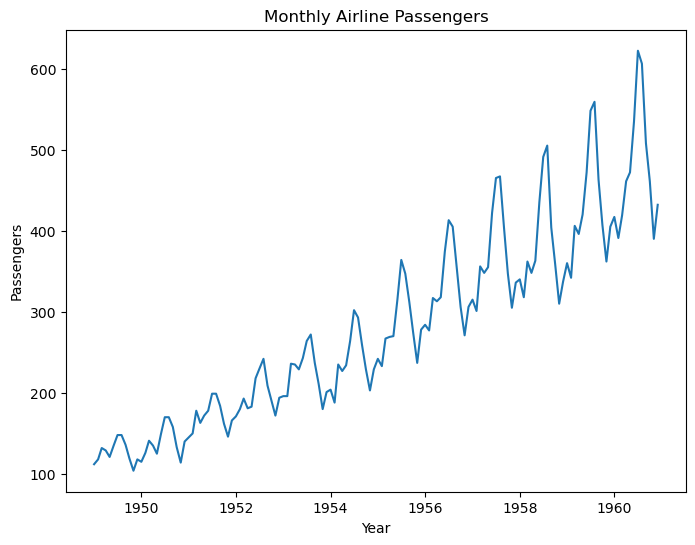

In [14]:
plt.figure(figsize=(8,6))
plt.plot(df['ds'], df['y'])
plt.title("Monthly Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.savefig("C:\Time Series Forecasting\images/time_series_plot.png", dpi=300)
plt.show()

# STATIONARITY CHECK (ADF TEST)

In [12]:
result = adfuller(df['y'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
# p-value > 0.05 indicates non-stationary (trend exists)


ADF Statistic: 0.8153688792060597
p-value: 0.9918802434376411


# DECOMPOSITION (TREND + SEASONALITY)

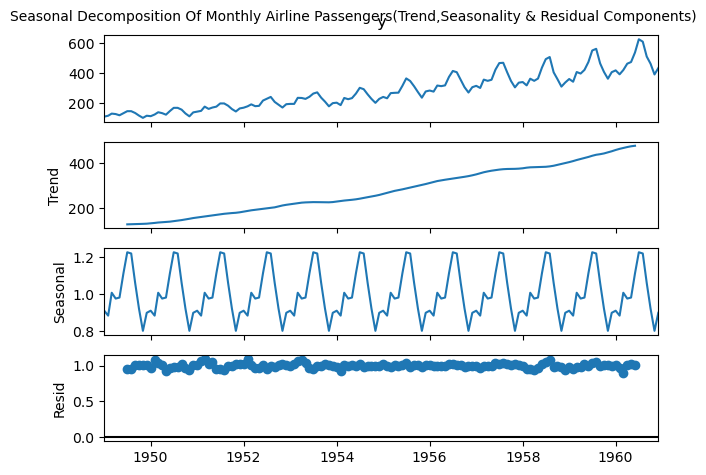

In [13]:
decomposition = seasonal_decompose(df.set_index('ds')['y'], model='multiplicative', period=12)
fig = decomposition.plot()
plt.savefig("C:\Time Series Forecasting\images\decomposition_plot.png", dpi=300)
plt.suptitle("Seasonal Decomposition Of Monthly Airline Passengers(Trend,Seasonality & Residual Components)",fontsize=10)
plt.show()